In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Problem 7: Bird baths in Australia

In [4]:
# load the data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-08-31/bird_baths.csv'
birds = pd.read_csv(url)
birds.head()

,survey_year,urban_rural,bioregions,bird_type,bird_count
0,2014.0,Urban,South Eastern Queensland,Bassian Thrush,0
1,2014.0,Urban,South Eastern Queensland,Chestnut-breasted Mannikin,0
2,2014.0,Urban,South Eastern Queensland,Wild Duck,0
3,2014.0,Urban,South Eastern Queensland,Willie Wagtail,0
4,2014.0,Urban,South Eastern Queensland,Regent Bowerbird,0


Our **goal** is to predict the probability of whether we’ll see a bird at a bird bath in Australia, given info like what kind of bird we’re looking for and whether the bird bath is in an urban or rural location.

We'll focus on birds from the following list.

In [5]:
birds_list = [
    'Noisy Miner',
    'Australian Magpie',
    'Rainbow Lorikeet',
    'Red Wattlebird',
    'Superb Fairy-wren',
    'Magpie-lark',
    'Pied Currawong',
    'Crimson Rosella',
    'Eastern Spinebill',
    'Spotted Dove',
    "Lewin's Honeyeater",
    'Satin Bowerbird',
    'Crested Pigeon',
    'Grey Fantail',
    'Red-browed Finch',
]

**Part 1:** Filter out the bird types that are not on the `birds_list` list.

In [28]:
# your code here
data = birds.loc[birds.bird_type.isin([
    'Noisy Miner',
    'Australian Magpie',
    'Rainbow Lorikeet',
    'Red Wattlebird',
    'Superb Fairy-wren',
    'Magpie-lark',
    'Pied Currawong',
    'Crimson Rosella',
    'Eastern Spinebill',
    'Spotted Dove',
    "Lewin's Honeyeater",
    'Satin Bowerbird',
    'Crested Pigeon',
    'Grey Fantail',
    'Red-browed Finch',
])]

**Part 2:** Add a `bird` column to the DataFrame, where the value is `1` when `bird_count>0`, and `0` when `bird_count=0`.

In [40]:
# your code here
def myFunction(count):
    if (count > 0):
        return 1
    else: 
        return(0)
data['bird'] = data.bird_count.apply(myFunction)

C:\Users\Derrick\AppData\Local\Temp\ipykernel_12464\2829256292.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bird'] = data.bird_count.apply(myFunction)


Drop the `bird_count` column

In [44]:
# your code here
data = data.drop('bird_count', axis=1)
data.head(5)

,survey_year,urban_rural,bioregions,bird_type,bird
22,2014.0,Urban,South Eastern Queensland,Satin Bowerbird,0
24,2014.0,Urban,South Eastern Queensland,Eastern Spinebill,0
35,2014.0,Urban,South Eastern Queensland,Red Wattlebird,0
44,2014.0,Urban,South Eastern Queensland,Crimson Rosella,0
84,2014.0,Urban,South Eastern Queensland,Australian Magpie,0


**Part 3:** How likely are you to see birds of different types (Australian Magpie, Crested Pigeon,...) in different locations (rural, urban)?

**Hint**: use `pd.pivot_table`.

In [94]:
# your code here
probability = data.pivot_table(index=['bird_type'], columns=['urban_rural'])

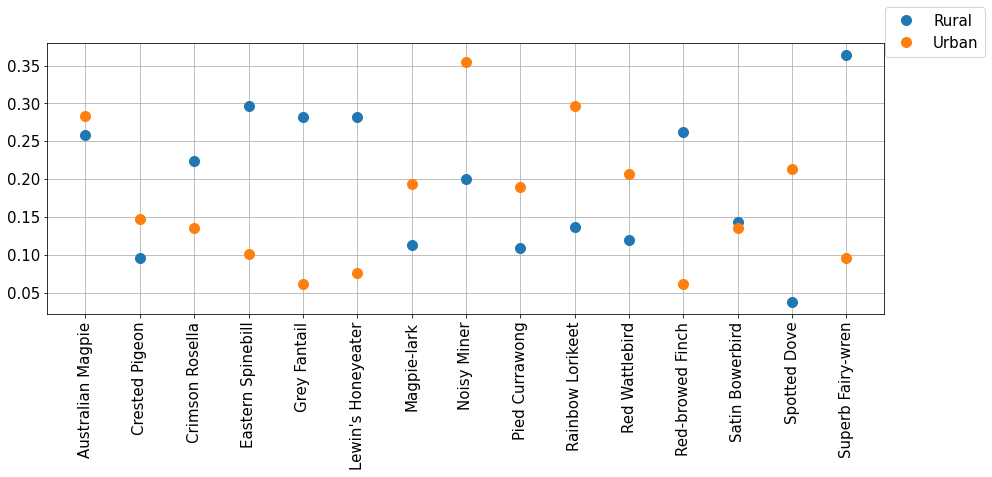

In [95]:
# run this cell to plot probabilities
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(probability.bird.Rural,'o',markersize='10', label='Rural')
ax.plot(probability.bird.Urban,'o',markersize='10', label='Urban')
ax.grid(True)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()

We'll use the `urban_rural`, `bird_type` and `bioregions` features to predict these probabilities.

**Part 4:** Define the feature matrix X (columns `urban_rural`, `bird_type` and `bioregions`) and the target vector y (`bird` column) from the dataframe, and then split X and y into training and testing sets.

In [103]:
# your code here
X = data[['urban_rural', 'bird_type', 'bioregions']]
y = data.bird

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
X.head(1)

,urban_rural,bird_type,bioregions
22,Urban,Satin Bowerbird,South Eastern Queensland


In [106]:
categorical_features = ['urban_rural', 'bird_type', 'bioregions']

**Part 5:** build a pipeline with the following steps: an imputer, a one-hot-encoder, and a logistic regression model.

In [107]:
# your  code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#setup logistic regression model
from sklearn.linear_model import LogisticRegression as logrec

#setup pipe
categorical_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

feature_processor = ColumnTransformer(transformers=[
    ('cat_processor', categorical_processor, categorical_features)
])

pipe = Pipeline(steps=[
    ('processor', feature_processor),
    ('clf', logrec(max_iter=2000))
])
pipe


Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('cat_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['urban_rural', 'bird_type',
                                                   'bioregions'])])),
                ('clf', LogisticRegression(max_iter=2000))])

Fit your pipeline to the training data

In [108]:
# your code here
pipe.fit(X_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('cat_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['urban_rural', 'bird_type',
                                                   'bioregions'])])),
                ('clf', LogisticRegression(max_iter=2000))])

Use the `predict_proba` method to compute the seeing-a-bird probability on the testing data.

In [160]:
# your code here
#pipe.predict_proba(X_test)
y_test_proba_unfiltered = pipe.predict_proba(X_test)
y_test_proba = []
for row in y_test_proba_unfiltered:
    y_test_proba.append(row[1])

Run the following two cells.

In [161]:
# this cell creates a dataframe with the computed probabilities
results = X_test.copy()
results['proba'] = y_test_proba
results

,urban_rural,bird_type,bioregions,proba
158437,Urban,Australian Magpie,Flinders Lofty Block,0.556772
105036,Urban,Pied Currawong,South Eastern Queensland,0.139383
80708,Urban,Lewin's Honeyeater,South Eastern Highlands,0.007208
9401,Urban,Rainbow Lorikeet,South Eastern Queensland,0.339323
5094,Rural,Eastern Spinebill,South Eastern Queensland,0.116433
...,...,...,...,...
137396,Rural,Grey Fantail,South Eastern Highlands,0.352951
15065,Urban,Eastern Spinebill,South Eastern Queensland,0.045318
27135,Urban,Lewin's Honeyeater,Sydney Basin,0.054352
121604,Urban,Magpie-lark,Sydney Basin,0.178764


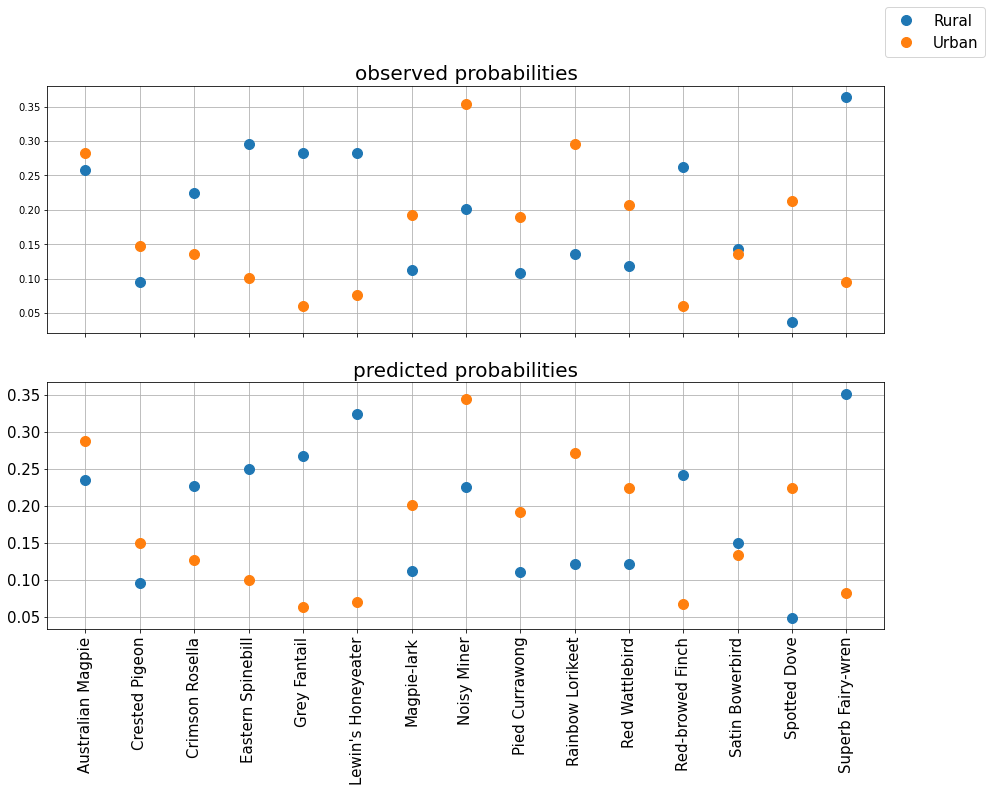

In [162]:
# this cell plots the observed and computed probabilities
probability_test = pd.pivot_table(data=results, values='proba', index='bird_type', columns='urban_rural', aggfunc = 'mean')

fig, ax = plt.subplots(2,1,figsize=(15,10),sharex=True)

ax[0].plot(probability.bird.Rural,'o',markersize='10', label='Rural')
ax[0].plot(probability.bird.Urban,'o',markersize='10', label='Urban')
ax[0].grid(True)
ax[0].set_title('observed probabilities', fontsize=20)

ax[1].plot(probability_test.Rural,'o',markersize='10')
ax[1].plot(probability_test.Urban,'o',markersize='10')
ax[1].grid(True)
ax[1].set_title('predicted probabilities', fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()

The predicted probabilities don't look great. 

**Part 6:** Add polynomial features (of degree 2) to your pipeline, and repeat **Part 5**

In [163]:
# setup poly features
from sklearn.preprocessing import PolynomialFeatures
#PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)

In [164]:
# your code here

#setup pipe
categorical_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
    ('poly_features', PolynomialFeatures(degree = 2)) # maybe add these args: interaction_only=False, include_bias=False
])

feature_processor = ColumnTransformer(transformers=[
    ('cat_processor', categorical_processor, categorical_features)
])

pipe = Pipeline(steps=[
    ('processor', feature_processor),
    ('clf', logrec(max_iter=2000))
])
pipe

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('cat_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder()),
                                                                  ('poly_features',
                                                                   PolynomialFeatures())]),
                                                  ['urban_rural', 'bird_type',
                                                   'bioregions'])])),
                ('clf', LogisticRegression(max_iter=2000))])

In [165]:
# fit data
pipe.fit(X_train,y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('cat_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder()),
                                                                  ('poly_features',
                                                                   PolynomialFeatures())]),
                                                  ['urban_rural', 'bird_type',
                                                   'bioregions'])])),
                ('clf', LogisticRegression(max_iter=2000))])

In [166]:
y_test_proba_unfiltered = pipe.predict_proba(X_test)
y_test_proba = []
for row in y_test_proba_unfiltered:
    y_test_proba.append(row[1])
    
# this cell creates a dataframe with the computed probabilities
results = X_test.copy()
results['proba'] = y_test_proba

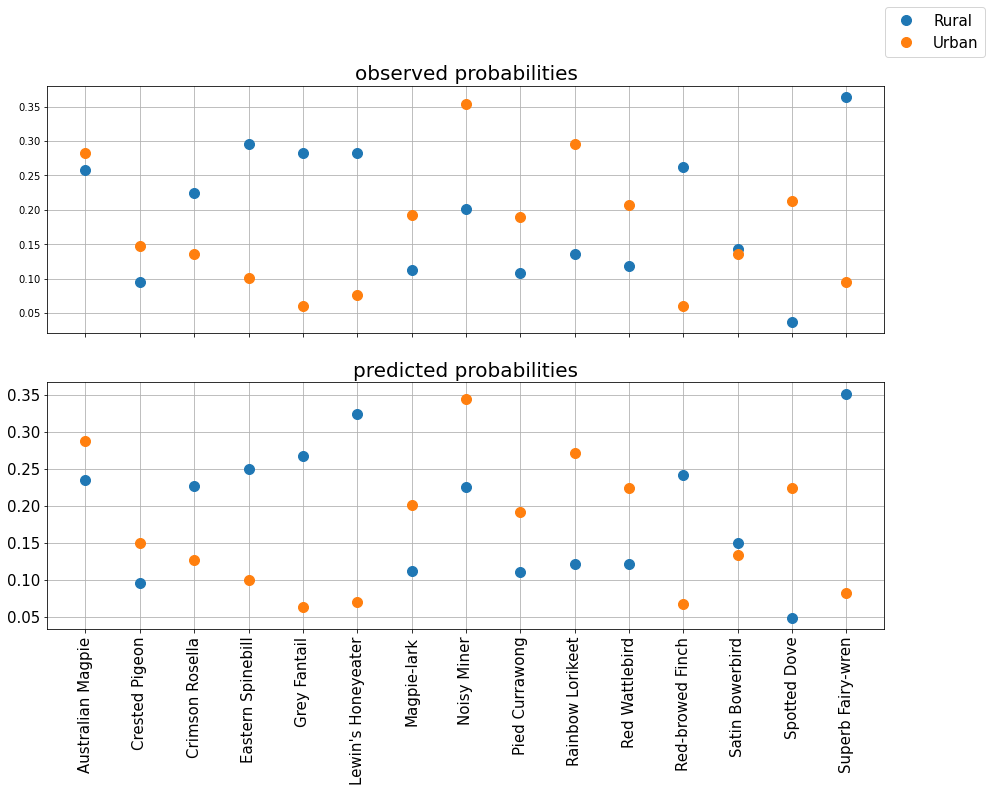

In [167]:
# this cell plots the observed and computed probabilities
probability_test = pd.pivot_table(data=results, values='proba', index='bird_type', columns='urban_rural', aggfunc = 'mean')

fig, ax = plt.subplots(2,1,figsize=(15,10),sharex=True)

ax[0].plot(probability.bird.Rural,'o',markersize='10', label='Rural')
ax[0].plot(probability.bird.Urban,'o',markersize='10', label='Urban')
ax[0].grid(True)
ax[0].set_title('observed probabilities', fontsize=20)

ax[1].plot(probability_test.Rural,'o',markersize='10')
ax[1].plot(probability_test.Urban,'o',markersize='10')
ax[1].grid(True)
ax[1].set_title('predicted probabilities', fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
fig.legend(fontsize=15)
plt.show()